In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datapreprocessed.csv")
Original = df.copy()
df.drop("Poutcome", inplace = True , axis=1)

In [3]:
df.head()

,Age,Education,Default,Balance,Housing,Loan,Duration,Campaign,Pdays,Previous,...,Job_umemployed,Job_entrepreneur,Job_housemaid,Married,divorced,Contact_cellular,Contact_telephone,Season_1,Season_2,First half of month
0,59,2,0,2343,1,0,1042,1,-1,0,...,0,0,0,1,0,0,0,0,1,1
1,56,2,0,45,0,0,1467,1,-1,0,...,0,0,0,1,0,0,0,0,1,1
2,41,2,0,1270,1,0,1389,1,-1,0,...,0,0,0,1,0,0,0,0,1,1
3,55,2,0,2476,1,0,579,1,-1,0,...,0,0,0,1,0,0,0,0,1,1
4,54,3,0,184,0,0,673,2,-1,0,...,0,0,0,1,0,0,0,0,1,1


In [3]:
#With Duration

columns = ['Housing','Duration','Campaign','Contact_cellular','Deposit']
df = df.reindex(columns=columns)
df.head()

,Housing,Duration,Campaign,Contact_cellular,Deposit
0,1,1042,1,0,1
1,0,1467,1,0,1
2,1,1389,1,0,1
3,1,579,1,0,1
4,0,673,2,0,1


# Model 1 Including Duration

# PROBIT MODEL

In [4]:
import statsmodels.api as sm

X = df[['Housing','Duration','Campaign','Contact_cellular']]
Y = df["Deposit"]
X = sm.add_constant(X)

probit = sm.Probit(endog=Y, exog = X)

result = probit.fit()

result.summary()

C:\Users\Arun-Windows\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.507316
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                Deposit   No. Observations:                11162
Model:                         Probit   Df Residuals:                    11157
Method:                           MLE   Df Model:                            4
Date:                Sun, 31 May 2020   Pseudo R-squ.:                  0.2666
Time:                        10:42:06   Log-Likelihood:                -5662.7
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9548      0.040    -24.061      0.000      -1.033      -0.877
Housing             -0.6171      0.028    -22.194      0.000      -0.672      -0.563
Duration             0.0025   5.31e-05     47.242      0.000       0.002       0.003
Campaign            -0.0834      0.007    -12.504      0.000      -0.097      -0.070
Contact_cellular     0.6500      0.032     20.098      0.000       0.587       0.713
====================================================================================
"""

# LOGIT MODEL

In [8]:
X = df[['Housing','Duration','Campaign','Contact_cellular']]
Y = df["Deposit"]
X = sm.add_constant(X)

logit = sm.Logit(endog=Y, exog = X)

result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.500061
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11157
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.2771
Time:                        18:20:25   Log-Likelihood:                -5581.7
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7073      0.071    -23.941      0.000      -1.847      -1.568
Housing             -1.0864      0.048    -22.433      0.000      -1.181      -0.991
Duration             0.0048      0.000     42.699      0.000       0.005       0.005
Campaign            -0.1509      0.012    -12.162      0.000      -0.175      -0.127
Contact_cellular     1.1093      0.057     19.437      0.000       0.997       1.221
====================================================================================
"""

In [5]:
#Using Sklearn for plotting roc
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

y_pred = classifier.predict(X)


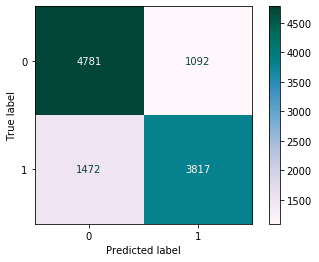

In [6]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X, Y , cmap='PuBuGn')  # doctest: +SKIP
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, classifier.predict(X))

0.7702920623544167

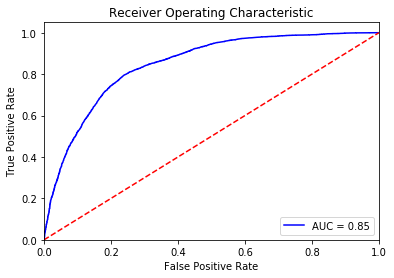

In [11]:
#ROC curve code
import sklearn.metrics as metrics

probs = classifier.predict_proba(X)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model 2 without Duration

# PROBIT MODEL

In [8]:
import statsmodels.api as sm

X = df[['Education','Campaign','Housing','Contact_cellular','First half of month','Married','Season_2']]
Y = df["Deposit"]
X = sm.add_constant(X)

probit = sm.Probit(endog=Y, exog = X)

result = probit.fit()

result.summary()

C:\Users\Arun-Windows\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.629926
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                Deposit   No. Observations:                11162
Model:                         Probit   Df Residuals:                    11154
Method:                           MLE   Df Model:                            7
Date:                Wed, 03 Jun 2020   Pseudo R-squ.:                 0.08941
Time:                        19:32:10   Log-Likelihood:                -7031.2
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                5.557e-294
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0102      0.056      0.182      0.856      -0.100       0.120
Education               0.0743      0.018      4.110      0.000       0.039       0.110
Campaign               -0.0500      0.006     -9.061      0.000      -0.061      -0.039
Housing                -0.4121      0.025    -16.427      0.000      -0.461      -0.363
Contact_cellular        0.4342      0.030     14.707      0.000       0.376       0.492
First half of month     0.2011      0.025      7.996      0.000       0.152       0.250
Married                -0.1785      0.025     -7.114      0.000      -0.228      -0.129
Season_2               -0.3775      0.027    -13.879      0.000      -0.431      -0.324
=======================================================================================
"""

# LOGIT MODEL

In [3]:
import statsmodels.api as sm

X = df[['Education','Campaign','Housing','Contact_cellular','First half of month','Married','Season_2']]
Y = df["Deposit"]
X = sm.add_constant(X)

logit = sm.Logit(endog=Y, exog = X)

result = logit.fit()

result.summary()

C:\Users\Arun-Windows\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.629599
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11154
Method:                           MLE   Df Model:                            7
Date:                Wed, 03 Jun 2020   Pseudo R-squ.:                 0.08988
Time:                        19:30:51   Log-Likelihood:                -7027.6
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                1.463e-295
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0192      0.092      0.210      0.834      -0.160       0.199
Education               0.1225      0.030      4.147      0.000       0.065       0.180
Campaign               -0.0884      0.010     -9.058      0.000      -0.108      -0.069
Housing                -0.6782      0.041    -16.570      0.000      -0.758      -0.598
Contact_cellular        0.7124      0.049     14.640      0.000       0.617       0.808
First half of month     0.3323      0.041      8.053      0.000       0.251       0.413
Married                -0.2909      0.041     -7.084      0.000      -0.371      -0.210
Season_2               -0.6091      0.044    -13.753      0.000      -0.696      -0.522
=======================================================================================
"""

In [4]:
#Using Sklearn for plotting roc
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

y_pred = classifier.predict(X)

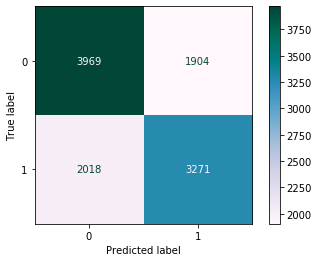

In [5]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X, Y , cmap='PuBuGn')  # doctest: +SKIP
plt.show()

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, classifier.predict(X))

0.648629277907185

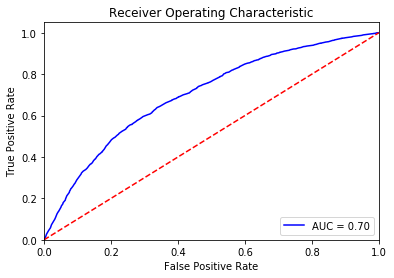

In [7]:
#ROC curve code
import sklearn.metrics as metrics

probs = classifier.predict_proba(X)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()